## Import of Library packages 
###### These are numpy,seaborn,pandas, matplotlib.pyplot and 

In [124]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
%matplotlib inline

## Reading the Dataset from the home directory location

In [125]:
df=pd.read_csv('CardioGoodFitness.csv')

## Checking the Columns in the Dataset

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Checking the Data types of a Data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 180 entries, 0 to 179

Data columns (total 9 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   Product        180 non-null    object

 1   Age            180 non-null    int64 

 2   Gender         180 non-null    object

 3   Education      180 non-null    int64 

 4   MaritalStatus  180 non-null    object

 5   Usage          180 non-null    int64 

 6   Fitness        180 non-null    int64 

 7   Income         180 non-null    int64 

 8   Miles          180 non-null    int64 

dtypes: int64(6), object(3)

memory usage: 10.6+ KB


## Observation

 1. Product, Gender and MaritalStatus are of object data type
 2. We will be converting them to categorical variables for consistency
 3. Other variables in the dataset are Integer data types which is good for analysis
 



### Converting the object data type to Categorical types

In [14]:
df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

### Reconfirming the Data Types

In [15]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [7]:
df.shape

(180, 9)

### Observation
## There are 180 rows and 9 columns in the dataset

In [8]:
df.head() ## To verify the first few rows of the dataset 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [11]:
df.tail()# To verify the last few rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [13]:
# To study for data consistency and pick a pattern in a Random number of samples
df.sample(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
94,TM498,24,Female,14,Single,3,2,40932,85
92,TM498,23,Female,14,Single,3,2,40932,53
39,TM195,26,Male,16,Partnered,4,4,44343,132
3,TM195,19,Male,12,Single,3,3,32973,85
152,TM798,25,Female,18,Partnered,5,5,61006,200
41,TM195,27,Female,14,Partnered,3,2,45480,66
164,TM798,28,Male,18,Single,6,5,88396,150
111,TM498,27,Male,14,Single,4,2,45480,53
154,TM798,25,Male,18,Partnered,6,4,70966,180
9,TM195,21,Female,15,Partnered,2,3,37521,85


## Observation:
The dataset indicates a structured set alligning with the description in the Data frame

In [9]:
#To confirm any missing values which in this case indicates none
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Observation

There are no missing values in the data frame


### Statistical Summary of the Data Set


In [10]:
# This  also gives us the 5 point Summary of the Dataframe
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Observation

1. As  seen above accross board the mean and median values are quite close indicating a near symetric distribution except for Income and Miles
2. A signicant pattern of skewness in the Income and Miles data is attributable to the likely presence of outliers
2. It also reflects the average age of the customers as approx. 29 years with a range of between 18 years to 50 years
3. The range of Educational experience is between 12 and 21 years 
4. The mileage to be covered ranges between 21 and 360 miles just as the income bracket is between 29,562 to 104,581 p.a

In [130]:
## We ought to extract the numerical values of the dataset for modal analysis and skewness

num_data=df.select_dtypes(include=["int64"])
print(num_data.columns)

print()

num_data.mode()

Index(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'], dtype='object')




,Age,Education,Usage,Fitness,Income,Miles
0,25,16,3,3,45480,85


#### Checking for Measures of Dispersion (IQR,Range,Standard and Mean Absolute Deviation

In [19]:
df.quantile(0.75) - df.quantile(0.25) #Inter Quartile Range

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [21]:
df.max()-df.min() #Range

Age             32
Education        9
Usage            5
Fitness          4
Income       75019
Miles          339
dtype: int64

## Observation
The Range for Income and Miles is so huge compared to others.The outliers in these
variables have an effect on the mean as it may not be a reliable 

In [22]:
df.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

## Observation
1. Clearly the high standard deviation for Income indcates the presence of outliers and the deviation from the mean position
2. The STD for Age indicates that the data is more clustered around the mean
3. This is equally similar for Education,Usage and Fitness

In [127]:
#  To determine Skewness
df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [131]:
# Arranging Skewness in descending order
skew_order = num_data.apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
skew_order

Miles        1.710092
Income       1.280995
Age          0.973957
Usage        0.733318
Education    0.617096
Fitness      0.451001
dtype: float64

In [132]:
# Returning the most highly skewed variables
skewness=skew_order[abs(skew_order)>0.7]
skewness

Miles     1.710092
Income    1.280995
Age       0.973957
Usage     0.733318
dtype: float64

## Observation
1. It has become quite evident regarding variables influencing Skewness
2. This totally validates the argument that since Mode< Median< Mean, then the distribution is positively skewed for Miles, Income, Age and Usage




## Analysing Categorical Data: Products, Gender and MaritalStatus

In [67]:
df['Product'].value_counts() # To makeup of the customers preferences by product 

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

##  Observation

1. 80 customers have a preference for the TM195 Treadmill
2. 60 customers have a preference for the TM498 Treadmill
3. 40 customers have a preference for the TM798 Treadmill

In [68]:
df['Gender'].value_counts()# To determins the mix of the customers by sex

Male      104
Female     76
Name: Gender, dtype: int64

##  Observation
1. There are 104 males and 76 females who make up the customers 

In [69]:
df['MaritalStatus'].value_counts()# To establish the makeup the customer status 

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Observation
There are 107 customers who were taken and 73 Singles

## Univariate Analysis

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

  warnings.warn(msg, FutureWarning)


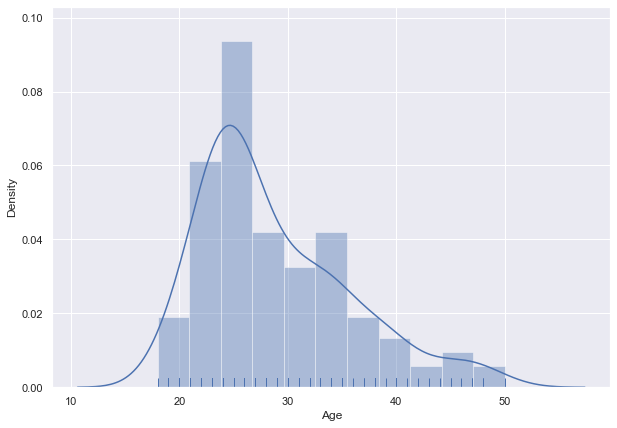

In [74]:
# Univariate Analysis
dat_A=df['Age']
plt.figure(figsize=(10,7))
sns.distplot(dat_A,kde=True, rug=True); # rug  includes markers in the plot
plt.savefig('dat_A.png')
plt.show()

In [80]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='r') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color='y') if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


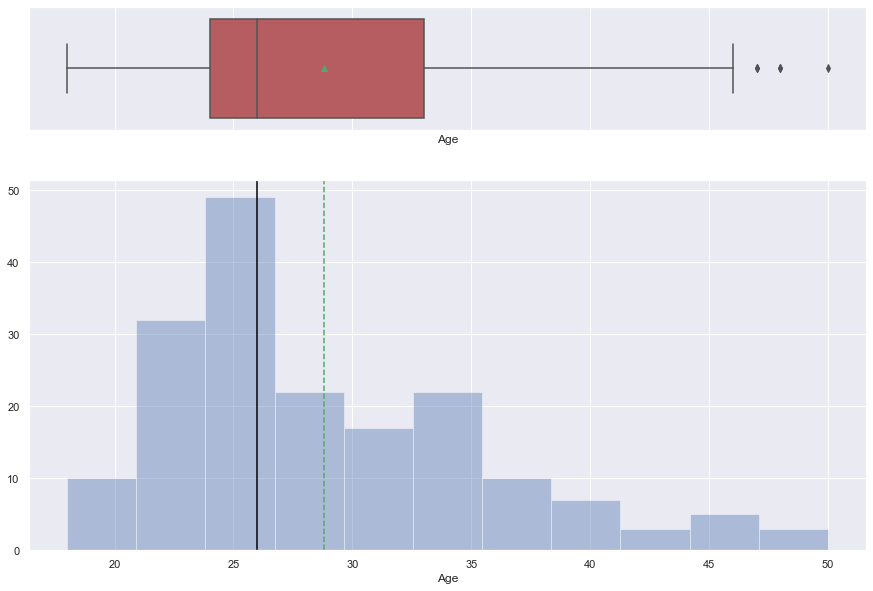

In [82]:
histogram_boxplot(df.Age)# To plot Histogram and box plot for Age distribution
plt.savefig('Plot_Age.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


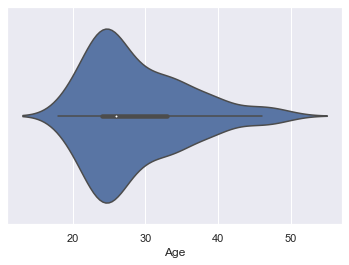

In [83]:
# This will reflect the mirror density distribution of this plot
sns.violinplot(dat_A);  
plt.savefig('viol_A.png')
plt.show()    

## Observation
1. It is indeed obvious that the Age distribution is rightly skewed,Mean>Median>Mode as evidenced by the histogram and the KDE indicating the positive skewness while noting the presence of outliers(see boxplot)
2. The Violin plot as well as the central tendency property plot is indicative of a large patronage by the age group between 18 and 40 years and the highest between 24 and 25 yrs old 

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

  warnings.warn(msg, FutureWarning)


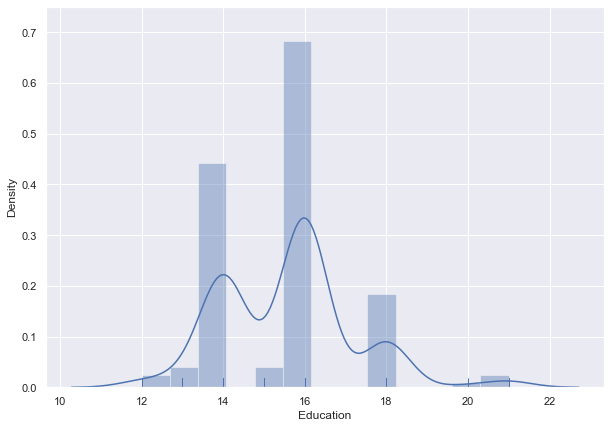

In [13]:
dat_E=df['Education']
plt.figure(figsize=(10,7))
sns.distplot(dat_E,kde=True,rug=True);
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


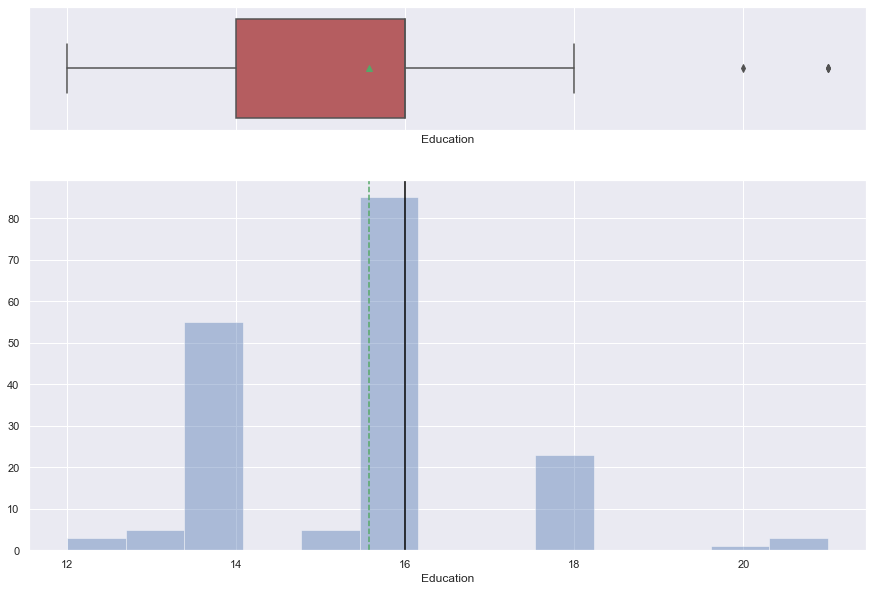

In [84]:
histogram_boxplot(df.Education) # for Education
plt.savefig('Plot_E.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


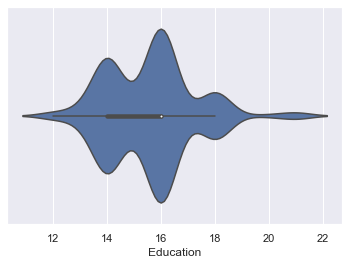

In [37]:
sns.violinplot(dat_E); # Similarly
plt.savefig('viol_E')

## Observation
1. As is obvious from the plots, we have a bimodial distribution indicating 2 patronage peaks by customers of different years of Educational experience though with the highest peak at nearly 16 years.
2. This indicates 2 groups of customers that could well impact on the product design, more resources and service 
3. This incidence precipitates the need for more exploration 

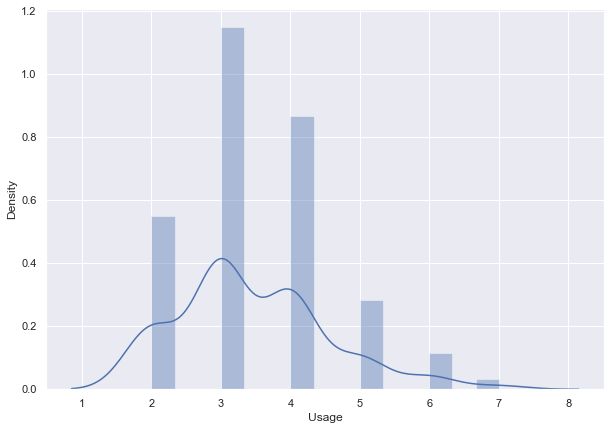

In [85]:
dat_U=df['Usage']
plt.figure(figsize=(10,7))
sns.distplot(dat_U,kde=True);
plt.savefig('dat_U.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


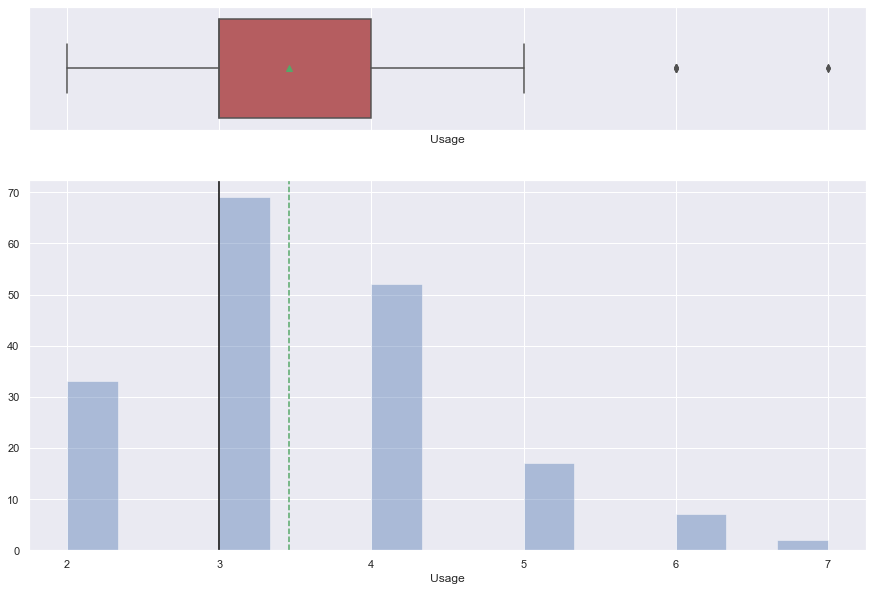

In [86]:
histogram_boxplot(df.Usage) # for Usage
plt.savefig('Plot_U.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


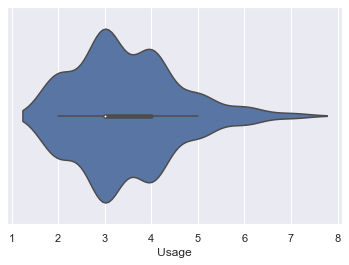

In [87]:
sns.violinplot(dat_U); #Violin plot for Usage 
plt.savefig('viol_U.png')

## Observation
1. It would appear as though there is a significant upward trend in the average no.of times the customers would prefer to use this service averaging 3 times as a result of the clusters around the mean and median
2. The  right skewenss indicates less customers would prefer to visit more no. of times

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


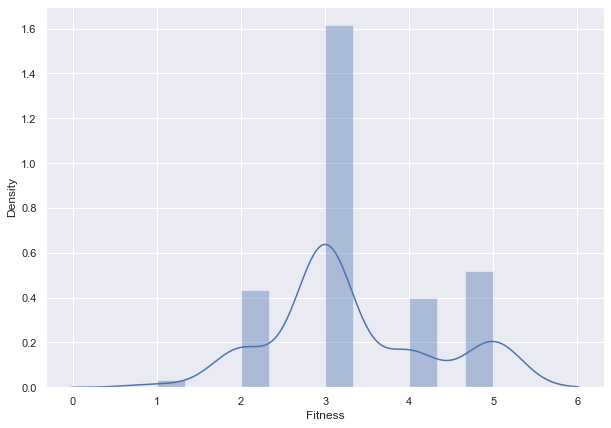

In [88]:
dat_F=df['Fitness'] 
plt.figure(figsize=(10,7))
sns.distplot(dat_F,kde=True);
plt.savefig('dat_F.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


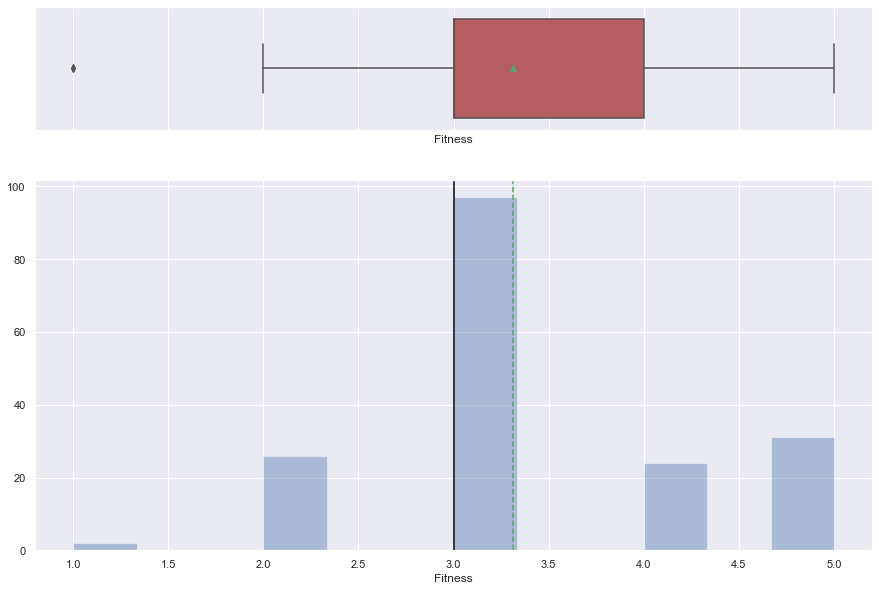

In [89]:
histogram_boxplot(df.Fitness)# for Fitness
plt.savefig('Plot_F.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


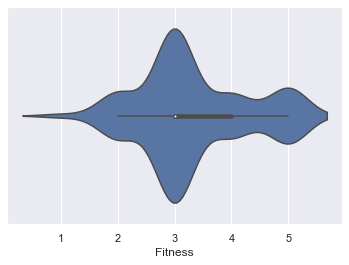

In [91]:
sns.violinplot(dat_F); #Violin plot for Fitness
plt.savefig('viol_F.png')


## Observation 
1. This shows a very significant cluster around the mean position indicating that a significat proportion of the customers are reasonably quite fit within the range of 3-3.5
2. The violin plot shows the density data cluster around the mean pointing to the fact that the subscription volume at this point significantly trumps others but declines as the distribution progresses

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


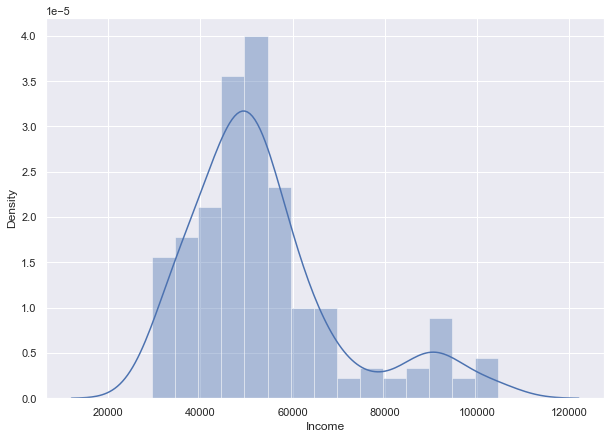

In [92]:
dat_I=df['Income']
plt.figure(figsize=(10,7))
sns.distplot(dat_I,kde=True);
plt.savefig('dat_I.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


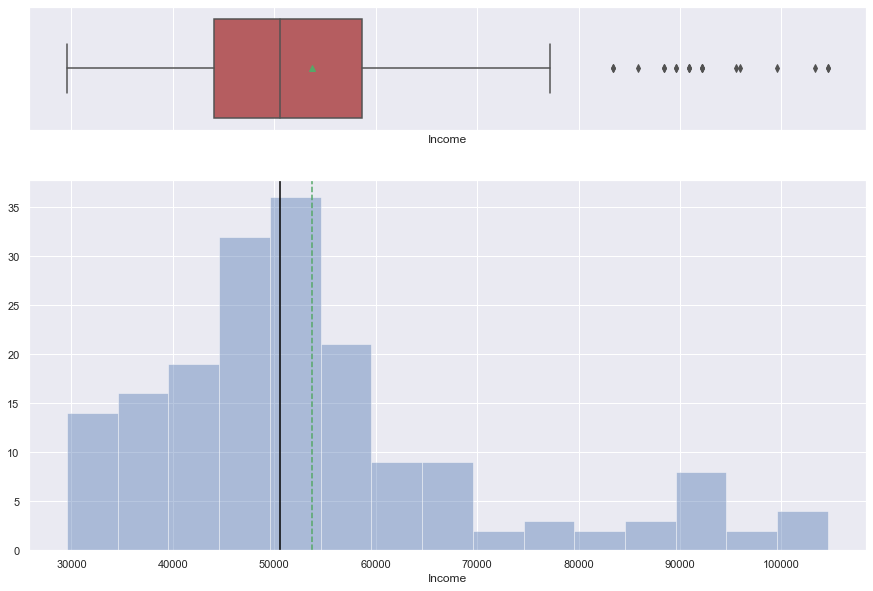

In [93]:
histogram_boxplot(df.Income) #for Income
plt.savefig('Plot_I.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


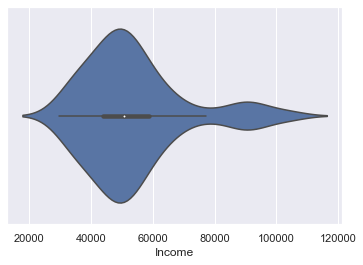

In [94]:
sns.violinplot(dat_I); #Violin plot for Income
plt.savefig('viol_I.png')

## Observation
1.This is a near symetric normal distribution with the mean > median but with a major cluster around these points(see violin plot) indicating a rate of subscription which saw growth and eventually peaked  for an income bracket of 30,000-60,000 and declined with time. But this may not be a true representation as there are possibilities of impact by outliers as seen on the box plot

2.Also we could state that the presrures of outliers(see boxplot) is clearly an evidence that the mean is not reliable, hence the need to probe deeper

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


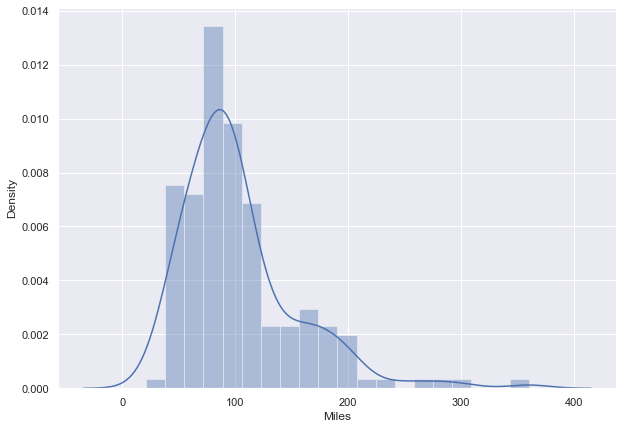

In [95]:
dat_M=df['Miles']
plt.figure(figsize=(10,7))
sns.distplot(dat_M,kde=True);
plt.savefig('dat_M.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


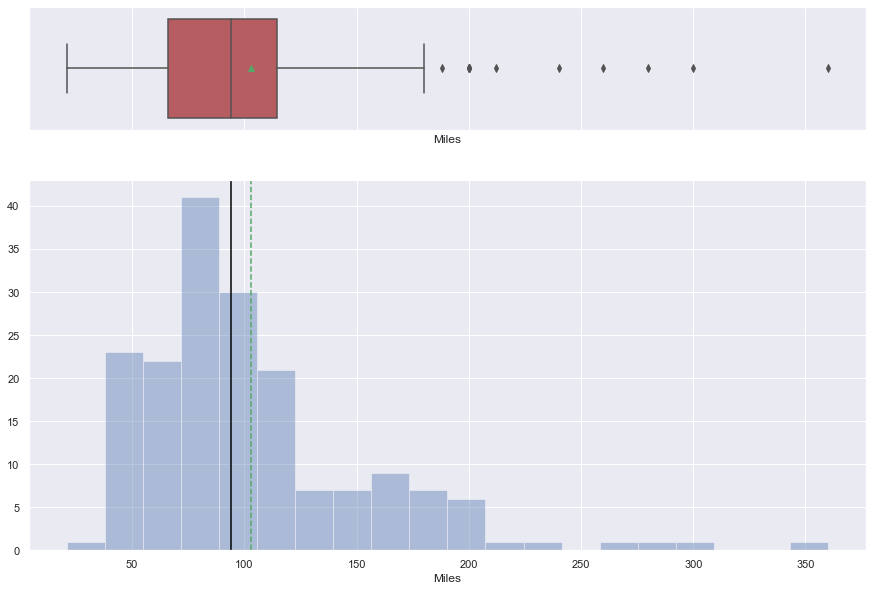

In [97]:
histogram_boxplot(df.Miles) # for Miles
plt.savefig('Plot_M.png')
plt.show()

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


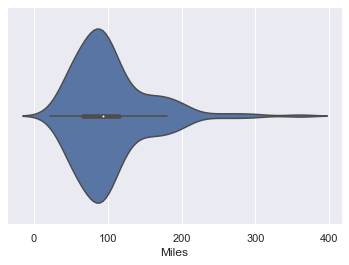

In [96]:
sns.violinplot(dat_M)
plt.savefig('viol_M.png')

## Observation
1. This is another justification of the argument of Mean>Median>Mode. This is a right skewed distibution with outliers(see boxplot)impacting on the mean position as well.Situations of this pattern triggers more reliance on the median position to analyse outcomes and draw inferences

2. The violin plot reflects the density of datapoints that clusters around the mean and withers as frequency or occurrence reduces  

3. A highly significant number of customers prefer to run between 50-125 miles

## MULTIIVARIATE ANALYSIS using pairplots and heat maps.

In [55]:
df.var() # variance of the distribution

Age          4.821217e+01
Education    2.614867e+00
Usage        1.176785e+00
Fitness      9.194289e-01
Income       2.724706e+08
Miles        2.689833e+03
dtype: float64

In [56]:
df.cov() #covariance of the distribution

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


## Observation
1. The appears to be some trace of dependency/proportionality between Usage and Fitness
2. The variation in Education equally has a positive covariance relationship  with Income
3. The other variables do not maintain a covarience relationship hence the need for a
pair plot and correlation heat map

In [57]:
df.corr() # correlation co-efficient of the distribution

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## Observation

1. There is a strong correlation between fitness and miles;
2. There is a strong correlation between Miles and Usage
3. Income has the most correlation with all variables

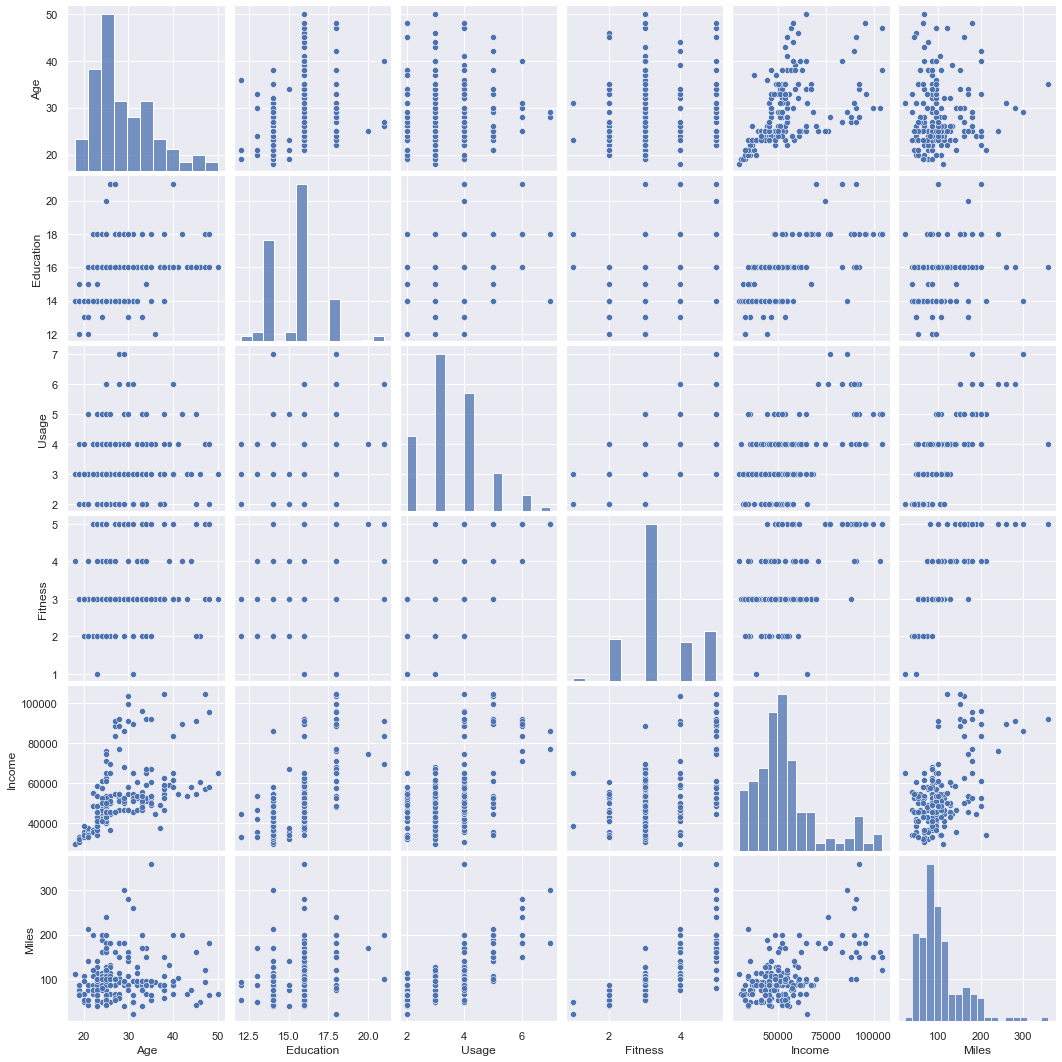

In [98]:
sns.pairplot(df); # pair plot for all numerical variables
plt.savefig('pair_plt.png')

## Observation

1There is no clear correlation between the variables from the pair plot

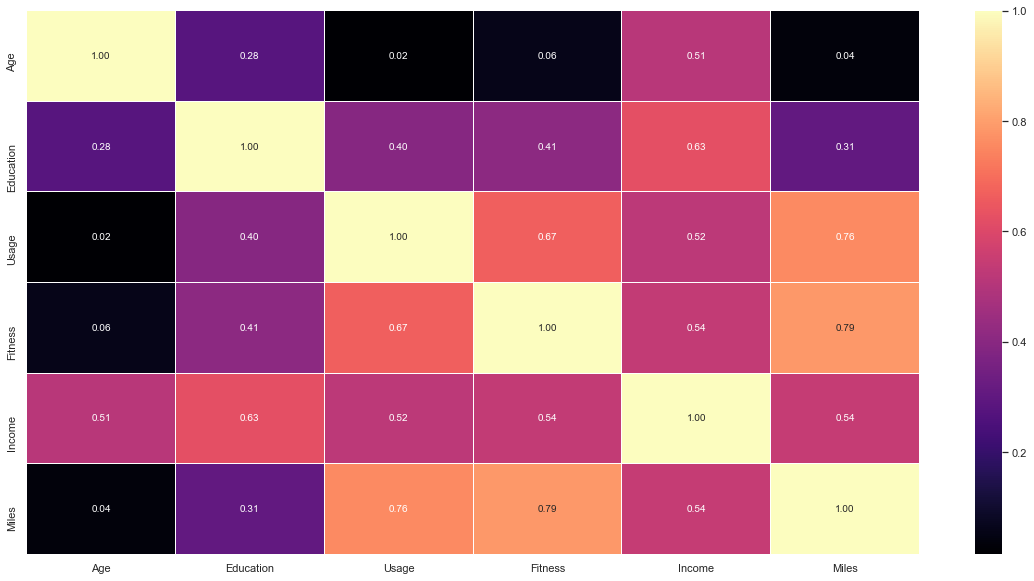

In [99]:
fig,ax = plt.subplots(figsize=(20, 10))  # Heat map plot showing Correlation Matrix 
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")# the color intensity is based on 
plt.savefig('heat_map.png')
plt.show()

## Observation
The following has been established from the heat map

1.There is a strong correlation between fitness and miles, the more fit the customer,the more the mileage on the treadmill
   
2.There is a strong correlation between Miles and Usage. The more the Usage of the Treadmill, the more the mileage

3.Income has the most correlation with all variables


## BIVARIATE ANALYSIS

### Numerical Variables

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


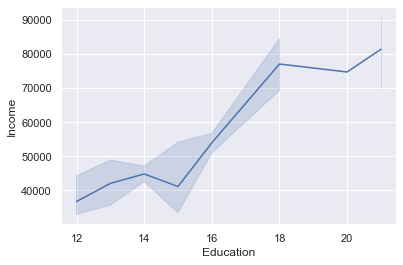

In [101]:
sns.lineplot(df['Education'], df['Income']);# using line plot toshow clarity in relationship
plt.savefig('lineplt_EI.png')

## Observation
1. The Line plot establishes a significant proportional relationship between Income and Education

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


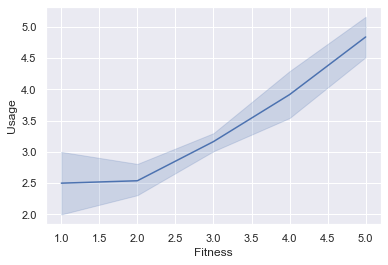

In [100]:
sns.lineplot(df['Fitness'], df['Usage']);
plt.savefig('lineplt_FU')

## Observation
This Linear relationship simply implies that the more usage of the Treadmills ,the more the fitness of the customer

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


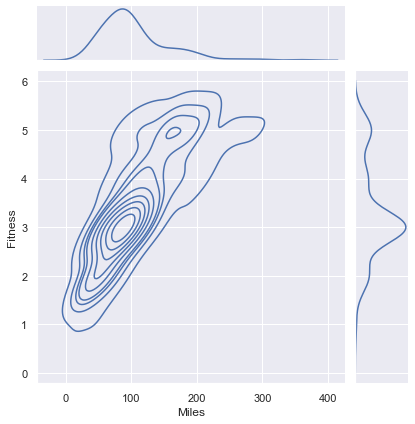

In [102]:
sns.jointplot(df['Miles'], df['Fitness'],kind='kde');
plt.savefig('jtplt_MF.png')

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


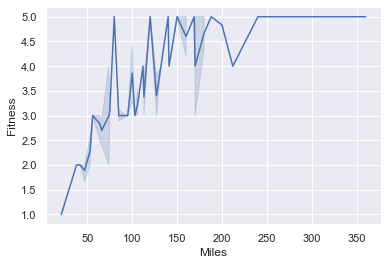

In [103]:
sns.lineplot(df['Miles'],df['Fitness']);# line plot Miles vs Fitness
plt.savefig('lineplt_MF.png')

## Observation
1. This joint plot has equally reflected a reasonable dependency between the Mile and Fitness
2. The Line plot makes indicate a appreciable relationship between both variables but stagnates between 250 and 360 miles

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


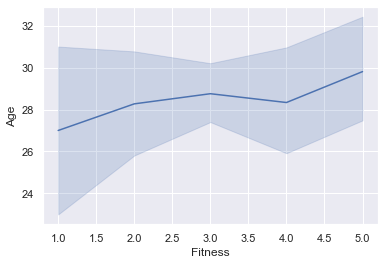

In [107]:
sns.lineplot(df['Fitness'],df['Age']); #Line Plot to show relationship between Age and Fitness
plt.savefig('lineplt_AF.png')

## Observation
We can infer that from the plot thst the age bracket of 27-30 years are marginally fit

## Exploratory Analysis on Categorical Variables

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


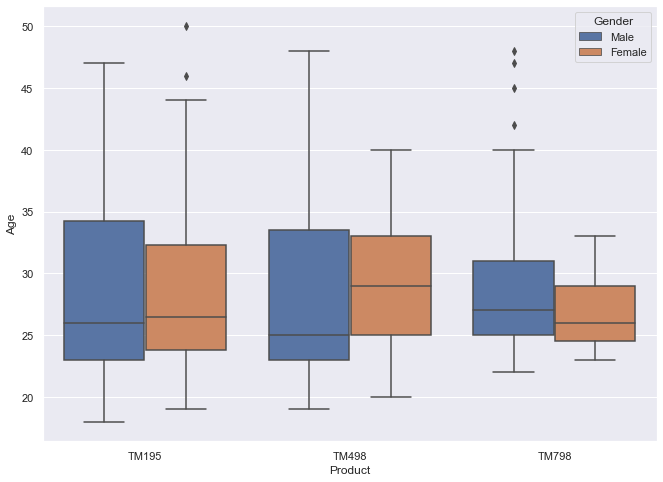

In [104]:
# We can infer from this boxplot the distribution of product by Age and Gender
plt.figure(figsize=(11,8))
sns.boxplot(df['Product'],df['Age'], hue=df['Gender']);
plt.savefig('plt_PAG.png')
plt.show()

## Observation
1. Accross the three product ranges, Males trumped females in preference and propensity to spend more in purchases
2. There is a TM798 preference by fewer young customers between ages 24-31 as opposed to much older Male customers 
3. There is  TM195 more preference by older females than any other product
4. TM 798 product has the least preference by female customers while TM 195 has the potential 
for the most patronage amonng males

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


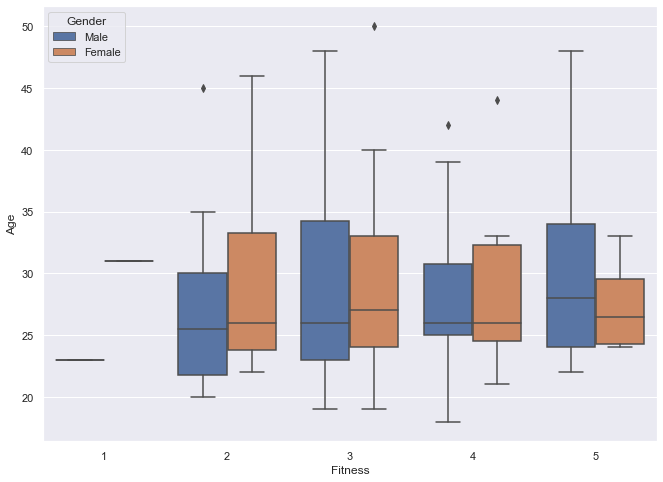

In [108]:
plt.figure(figsize=(11,8)) # box plot for Fitness, Age and Gender( 2 Num vs 1 Cat)
sns.boxplot(df['Fitness'],df['Age'], hue=df['Gender']);
plt.savefig('boxplt_FG.png')
plt.show()

## Observation
1. The plot confirms that the fittest is the Male
2. it is also confirmed that older men are much fitter than older women
3. Its also interesting how right skewed indicating the customer clusters around the mean points across the distribution

In [38]:
df_cat=df[['Product','Gender', 'MaritalStatus']]# Extracting the Categorical Variables
df_cat

,Product,Gender,MaritalStatus
0,TM195,Male,Single
1,TM195,Male,Single
2,TM195,Female,Partnered
3,TM195,Male,Single
4,TM195,Male,Partnered
...,...,...,...
175,TM798,Male,Single
176,TM798,Male,Single
177,TM798,Male,Single
178,TM798,Male,Partnered


In [63]:
df_cat.dtypes.value_counts()

category    1
category    1
category    1
dtype: int64

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


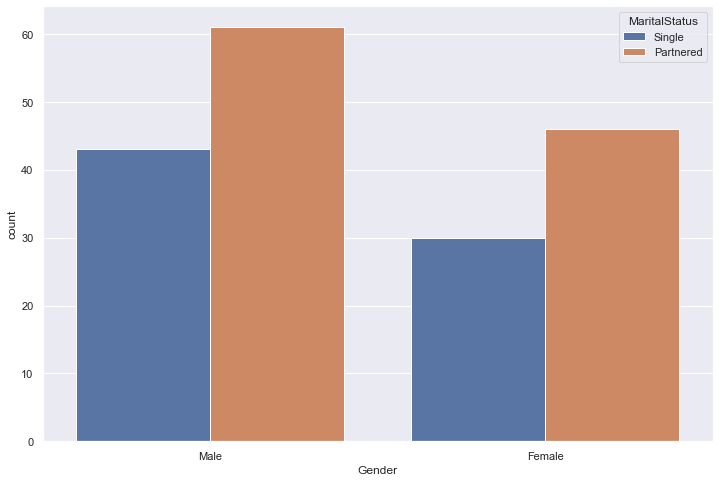

In [109]:
plt.figure(figsize=(12,8)) # Bar plot for the Bivariate analysis of 2 Cat.Variables
sns.countplot(df_cat['Gender'],hue=df_cat['MaritalStatus'])
plt.savefig('countplt_GM.png')
plt.show()

## Observation
There are more married male and female partners than there are male and female singles

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


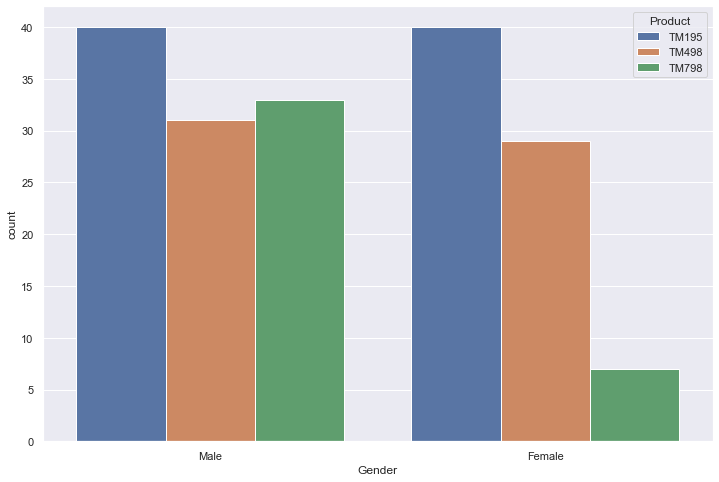

In [110]:
plt.figure(figsize=(12,8))# Count plot for two Cat. variables
sns.countplot(df_cat['Gender'],hue=df_cat['Product']);
plt.savefig('countplt_GP.png')
plt.show()

## Observations

1. TM 195 has the higheshest preference between both sexes with 80 items ordered
2. TM 498 comes second in preference between both sexes with roughly 60 items
3. While TM 798 was the least preferred with a distant 40 even though it edged TM 498 by 2 units among males.

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


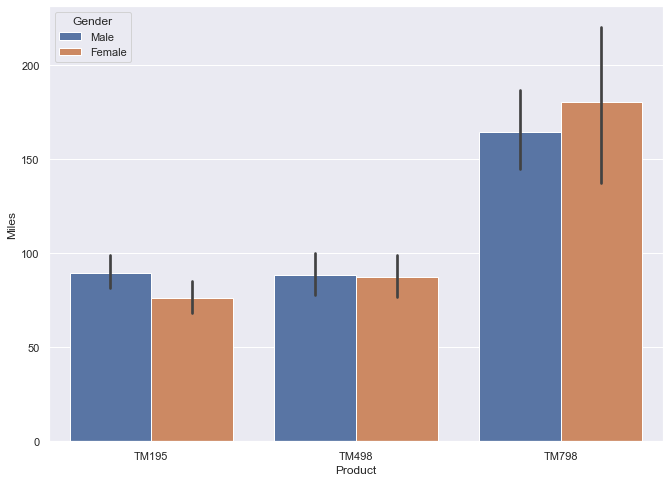

In [111]:
plt.figure(figsize=(11,8)) # bar plot for 1 Num Vs 2 Cat. Variables
sns.barplot(df_cat['Product'],df['Miles'],hue=df_cat['Gender']);
plt.savefig('barplt_PMG.png')
plt.show()

## Observation
1. Females hope to run 3 miles more than the males on the TM 798 Treadmill
2. Males hope to run about 10 miles more than females on the TM 195 Treadmill
3. Thesame mileage is to be covered by both sexes on the TM 498 Treadmill

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


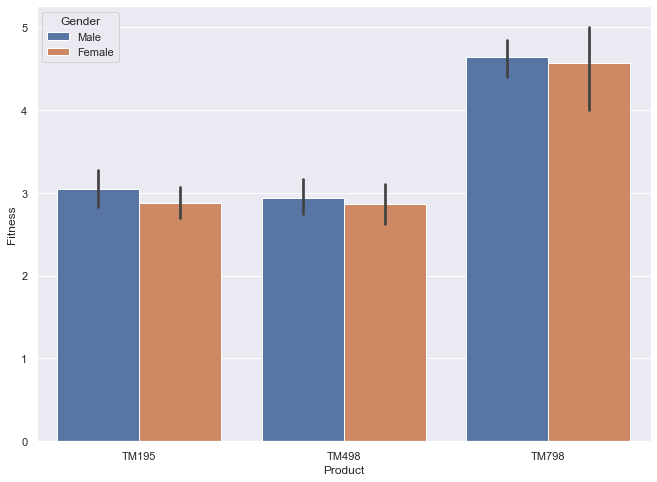

In [112]:
plt.figure(figsize=(11,8))# bar plot for 1 Num and 2 Cat. variables
sns.barplot(df_cat['Product'],df['Fitness'],hue=df_cat['Gender']);
plt.savefig('barplt_PFG.png')
plt.show()

## Observation
1. From all indications, the TM798 is the most productive of all the Treadmills
2. As is evident, the TM 195 and 498 are almost at par in preference and impact per performance

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


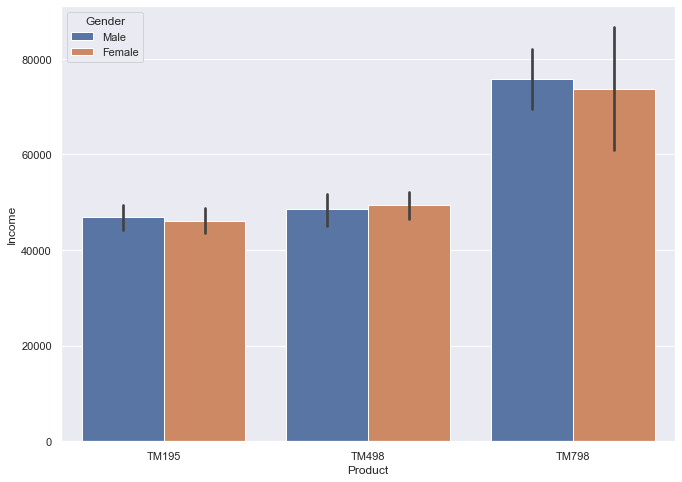

In [113]:
plt.figure(figsize=(11,8))# Same as above .1 Num vs 2 Cat. variables
sns.barplot(df_cat['Product'],df['Income'],hue=df_cat['Gender']);
plt.savefig('barplt_PIG.png')
plt.show()

## Observation
1. Customers with the highest incomes prefer TM798  product
2. The middle income earners prefer the TM195 and TM498 products

C:\Users\joseph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


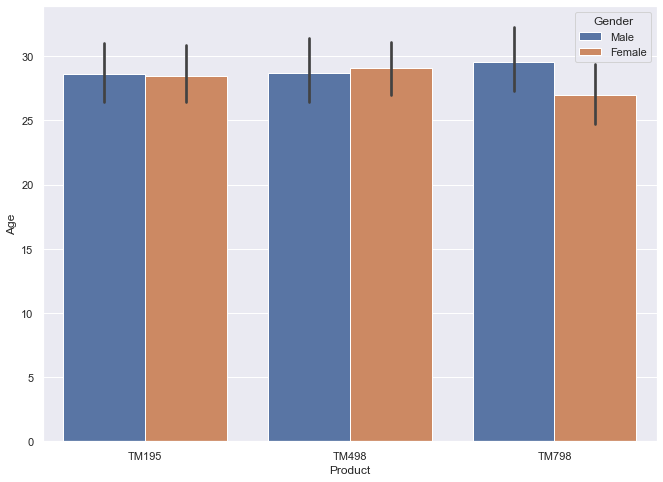

In [115]:
plt.figure(figsize=(11,8))# 1 Num vs 2 Cat. variables
sns.barplot(df_cat['Product'],df['Age'],hue=df_cat['Gender']);
plt.savefig('barplt_PAG.png')
plt.show()

## Observation
1. The TM195 and 498 Products have an equal preference by customers of same age bracket(18-33 yrs)
2. The TM798 product enjoys preference from older males and fewer females under 30yrs

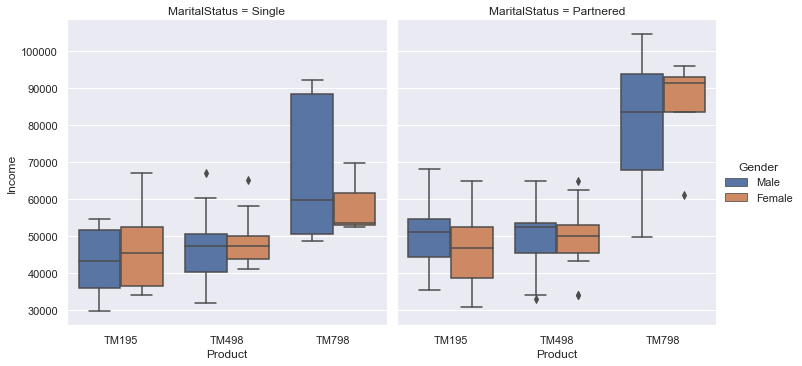

In [117]:
sns.catplot(x="Product",
               y = "Income",
               hue="Gender", 
               col="MaritalStatus", 
               data=df, 
               kind="box");#catplot to compare numerical and categorical variables
plt.savefig('catplt_PIGM.png')

## Observation concerning recommendations for Product Design and Restocking
1. TM  195 and 498 products appear to be the target of mid-income married partners
2. TM 798 product is the most preferred by High-income  male and female married partners
3. Both married and Single males and females in thesame earning bracket have an equal preference for TM498

In [44]:
!pip install pandas-profiling

## Pandas Profiling

Though not an absolutely fullproof measure of Data Analysis. One can use same as a check to validate one's insight and conlucions

In [50]:
import pandas_profiling
import pandas as pd
df=pd.read_csv('CardioGoodFitness.csv')

In [52]:
pandas_profiling.ProfileReport(df)